<a href="https://colab.research.google.com/github/qkrdudwls/Exploring-the-Bible-and-Quran-Books/blob/main/TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TF-IDF를 통한 단어 중요도 분석**

## Overview
- Bible과 Quran을 chapter별로 crawling
- TF-IDF 계산 및 시각화

## Set up

### 구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Selenium 설치 & 구글 드라이브에 chromedriver 설치

In [ ]:
!pip install selenium
!apt-get update

!apt install chromium-chromedriver
!cp /usr/bin/lib/chromium-browser/chromedriver '/content/drive/MyDrive/Colab Notebooks'
!pip install chromedriver-autoinstaller

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,531 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,454 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,626 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
G

### Spark 설치

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive2
!apt install openjdk-8-jdk-headless -qq

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 14.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=970fa47899e29cbca4e97106995a33137dd91bbb8acec979c50491298d5c1ec5
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 86.5 MB/s eta 0:00:00
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  op

### Word Cloud 및 NLTK 패키지 설치
- NLTK의 stopwords, punkt 패키지 다운로드

In [ ]:
!pip install wordcloud

import nltk
nltk.download('stopwords')
nltk.download('punkt')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Version 확인

In [ ]:
!python --version

import selenium
import pyspark
import wordcloud
import nltk
import spacy

print(f"Selenium {selenium.__version__}")
print(f"PySpark {pyspark.__version__}")
print(f"Word Cloud {wordcloud.__version__}")
print(f"NLTK {nltk.__version__}")
print(f"spaCy {spacy.__version__}")

Python 3.10.12
Selenium 4.27.1
PySpark 3.5.3
Word Cloud 1.9.4
NLTK 3.9.1
spaCy 3.7.5


### Import Library

In [ ]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import sys
from selenium.webdriver.common.keys import Keys
import urllib.request
import os
from urllib.request import urlretrieve

import time
import pandas as pd
import chromedriver_autoinstaller
import re

import glob
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, HashingTF, IDF, StopWordsRemover, CountVectorizer
from pyspark.sql.functions import col, explode, udf, lower, regexp_replace
from pyspark.sql.types import ArrayType, StructType, StructField, StringType, DoubleType
from pyspark.ml.linalg import SparseVector
from wordcloud import WordCloud
import spacy
import nltk
from nltk.corpus import stopwords

### chrome_options 설정

In [ ]:
chrome_path="/content/drive/Mydrive/Colab Notebooks/chromedriver"

sys.path.insert(0,chrome_path)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

chromedriver_autoinstaller.install()

## Crawling

### URL 설정

In [ ]:
bible_url = 'https://www.gutenberg.org/cache/epub/10/pg10-images.html'
quran_url = 'https://www.gutenberg.org/cache/epub/2800/pg2800-images.html'

### 데이터 전처리 함수
- 영어 알파벳과 공백, 마침표만 제외하고 모두 제거
- 모든 문자를 소문자로 변환
- 연속된 공백을 단일 공백으로 축소
- 양 끝의 공백 제거

In [ ]:
def preprocess_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s.]', '', text)
    cleaned_text = cleaned_text.lower()
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    return cleaned_text.strip()

### Bible
- 첫 번째 div는 건너뛰고 두 번째 div부터 순회 (첫 번째 div는 제목)

In [ ]:
bible_chapter_driver = webdriver.Chrome(options=chrome_options)
bible_chapter_driver.get(bible_url)
wait = WebDriverWait(bible_chapter_driver, 10)

output_folder = "bible_texts"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

try:
    chapter_divs = bible_chapter_driver.find_elements(By.CLASS_NAME, "chapter")

    for index, chapter_div in enumerate(chapter_divs[1:], start=2):
        chapter_text = chapter_div.get_attribute("textContent")
        chapter_text = preprocess_text(chapter_text)
        chapter_text = chapter_text.strip()

        if chapter_text:
            filename = os.path.join(output_folder, f"chapter_{index-1}.txt")
            with open(filename, "w", encoding="utf-8") as file:
                file.write(chapter_text)
            print(f"Saved text from div #{index-1} to {filename}")

except Exception as e:
    print("Error:", e)

finally:
    bible_chapter_driver.quit()

Saved text from div #1 to bible_texts/chapter_1.txt
Saved text from div #2 to bible_texts/chapter_2.txt
Saved text from div #3 to bible_texts/chapter_3.txt
Saved text from div #4 to bible_texts/chapter_4.txt
Saved text from div #5 to bible_texts/chapter_5.txt
Saved text from div #6 to bible_texts/chapter_6.txt
Saved text from div #7 to bible_texts/chapter_7.txt
Saved text from div #8 to bible_texts/chapter_8.txt
Saved text from div #9 to bible_texts/chapter_9.txt
Saved text from div #10 to bible_texts/chapter_10.txt
Saved text from div #11 to bible_texts/chapter_11.txt
Saved text from div #12 to bible_texts/chapter_12.txt
Saved text from div #13 to bible_texts/chapter_13.txt
Saved text from div #14 to bible_texts/chapter_14.txt
Saved text from div #15 to bible_texts/chapter_15.txt
Saved text from div #16 to bible_texts/chapter_16.txt
Saved text from div #17 to bible_texts/chapter_17.txt
Saved text from div #18 to bible_texts/chapter_18.txt
Saved text from div #19 to bible_texts/chapter

### Quran
- 크롤링 종료 조건: ```<div id="pg-end-separator">``` 발견 시

In [ ]:
quran_chapter_driver = webdriver.Chrome(options=chrome_options)
quran_chapter_driver.get(quran_url)
wait = WebDriverWait(quran_chapter_driver, 10)

output_dir = 'quran_texts'
os.makedirs(output_dir, exist_ok=True)

current_document = []
chapter_count = 1
start_crawling = False

try:
    elements = quran_chapter_driver.find_elements(By.XPATH, "//*[name()='h4' or name()='p' or @id='pg-end-separator']")

    for element in elements:
        if element.tag_name == 'div' and element.get_attribute('id') == 'pg-end-separator':
            break

        if element.tag_name == 'h4':
            start_crawling = True

            if current_document:
                quran_processed_text = ' '.join(preprocess_text(' '.join(current_document)).split())

                with open(os.path.join(output_dir, f'chapter_{chapter_count}.txt'), 'w', encoding='utf-8') as file:
                    file.write(quran_processed_text)

                print(f"Saved chapter {chapter_count} to {output_dir}/chapter_{chapter_count}.txt")

                chapter_count += 1
                current_document = []

        if start_crawling and element.tag_name == 'p':
            quran_text = preprocess_text(element.text.strip())
            current_document.append(quran_text)

    if current_document:
        quran_processed_text = ' '.join(preprocess_text(' '.join(current_document)).split())
        with open(os.path.join(output_dir, f'chapter_{chapter_count}.txt'), 'w', encoding='utf-8') as file:
            file.write(quran_processed_text)
        print(f"Saved chapter {chapter_count} to {output_dir}/chapter_{chapter_count}.txt")

except Exception as e:
    print("Error:", e)

quran_chapter_driver.quit()

Saved chapter 1 to quran_texts/chapter_1.txt
Saved chapter 2 to quran_texts/chapter_2.txt
Saved chapter 3 to quran_texts/chapter_3.txt
Saved chapter 4 to quran_texts/chapter_4.txt
Saved chapter 5 to quran_texts/chapter_5.txt
Saved chapter 6 to quran_texts/chapter_6.txt
Saved chapter 7 to quran_texts/chapter_7.txt
Saved chapter 8 to quran_texts/chapter_8.txt
Saved chapter 9 to quran_texts/chapter_9.txt
Saved chapter 10 to quran_texts/chapter_10.txt
Saved chapter 11 to quran_texts/chapter_11.txt
Saved chapter 12 to quran_texts/chapter_12.txt
Saved chapter 13 to quran_texts/chapter_13.txt
Saved chapter 14 to quran_texts/chapter_14.txt
Saved chapter 15 to quran_texts/chapter_15.txt
Saved chapter 16 to quran_texts/chapter_16.txt
Saved chapter 17 to quran_texts/chapter_17.txt
Saved chapter 18 to quran_texts/chapter_18.txt
Saved chapter 19 to quran_texts/chapter_19.txt
Saved chapter 20 to quran_texts/chapter_20.txt
Saved chapter 21 to quran_texts/chapter_21.txt
Saved chapter 22 to quran_texts

## TF-IDF 계산 및 시각화
- TF-IDF 점수가 가장 높은 상위 100개의 단어로 Word Cloud와 그래프 생성
- 데이터 전처리: 대명사와 전치사 등 상대적으로 덜 중요한 단어 제거
  - NLTK, spaCy, 사용자 정의 불용어 목록 사용

### Bible

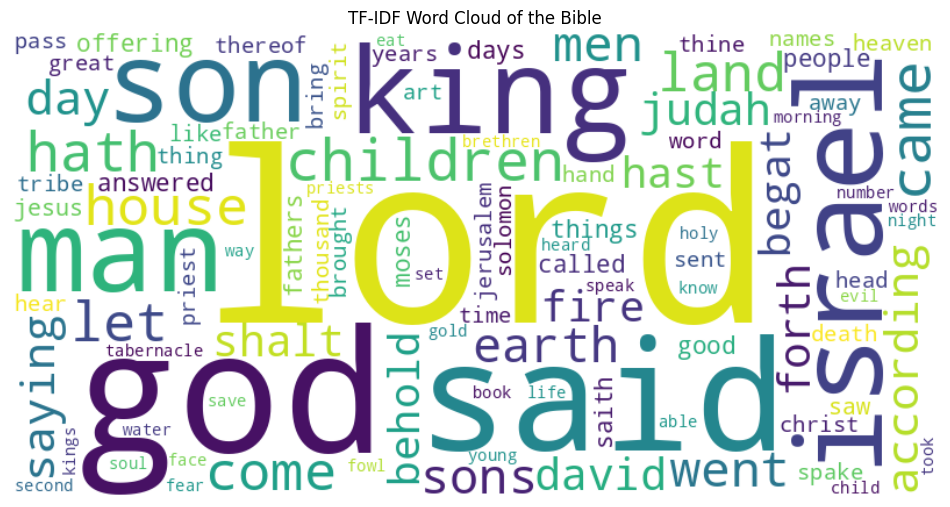

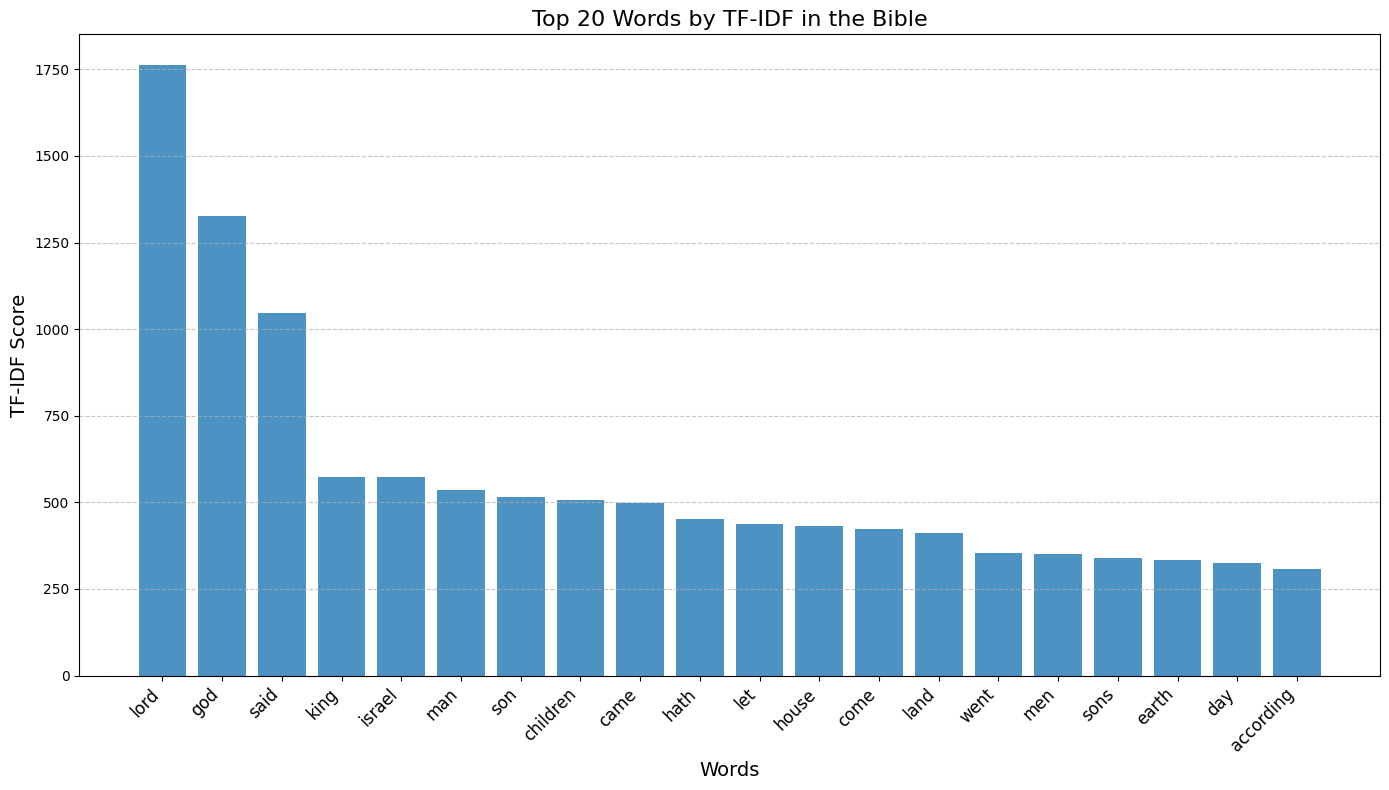

In [ ]:
nltk_stopwords = set(nltk.corpus.stopwords.words('english'))

nlp = spacy.load("en_core_web_sm")
spacy_stopwords = nlp.Defaults.stop_words

custom_stopwords = ["unto", "shall", "thy", "thee", "thou", "ye"]
all_stopwords = list(nltk_stopwords | spacy_stopwords | set(custom_stopwords))

spark = SparkSession.builder.appName("TF-IDF of the Bible").config("spark.executor.memory", "2g").config("spark.driver.memory", "2g").getOrCreate()

file_paths = sorted(glob.glob("bible_texts/chapter_*.txt"))
documents = [(i, open(file, 'r', encoding='utf-8').read()) for i, file in enumerate(file_paths)]
df = spark.createDataFrame(documents, ["doc_id", "text"])

df = df.withColumn("text", regexp_replace(lower(col("text")), "[^a-zA-Z\\s]", ""))

tokenizer = Tokenizer(inputCol="text", outputCol="words")
words_data = tokenizer.transform(df).cache()

remover = StopWordsRemover(inputCol="words", outputCol="filtered_words", stopWords=all_stopwords)
filtered_words_data = remover.transform(words_data).cache()

hashingTF = HashingTF(inputCol="filtered_words", outputCol="rawFeatures", numFeatures=500)
featurized_data = hashingTF.transform(filtered_words_data).cache()

idf = IDF(inputCol="rawFeatures", outputCol="features")
idf_model = idf.fit(featurized_data)
rescaled_data = idf_model.transform(featurized_data).cache()

def extract_words_and_tfidf(features, words):
    if isinstance(features, SparseVector):
        return [(words[idx], float(features.values[i])) for i, idx in enumerate(features.indices) if idx < len(words)]
    return []

extract_udf = udf(extract_words_and_tfidf, ArrayType(StructType([StructField("word", StringType()),StructField("tfidf", DoubleType())])))

exploded_data = rescaled_data.withColumn("word_tfidf", explode(extract_udf(col("features"), col("filtered_words"))))
word_tfidf_df = exploded_data.select(col("word_tfidf.word").alias("word"), col("word_tfidf.tfidf").alias("tfidf_score"))

top_words = word_tfidf_df.groupBy("word").sum("tfidf_score").withColumnRenamed("sum(tfidf_score)", "tfidf_score")
word_tfidf_pd_bible = top_words.orderBy(col("tfidf_score"), ascending=False).limit(100).toPandas()

word_tfidf_pd_bible.to_csv('/content/bible_tfidf.csv',index=False)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(word_tfidf_pd_bible.word, word_tfidf_pd_bible.tfidf_score))
)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("TF-IDF Word Cloud of the Bible")
plt.show()

def plot_bar_chart(data, title, top_n=20):
    top_words = data.sort_values(by="tfidf_score", ascending=False).head(top_n)

    plt.figure(figsize=(14, 8))
    plt.bar(top_words["word"], top_words["tfidf_score"], alpha=0.8)
    plt.xlabel("Words", fontsize=14)
    plt.ylabel("TF-IDF Score", fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_bar_chart(word_tfidf_pd_bible, "Top 20 Words by TF-IDF in the Bible", top_n=20)

### Quran

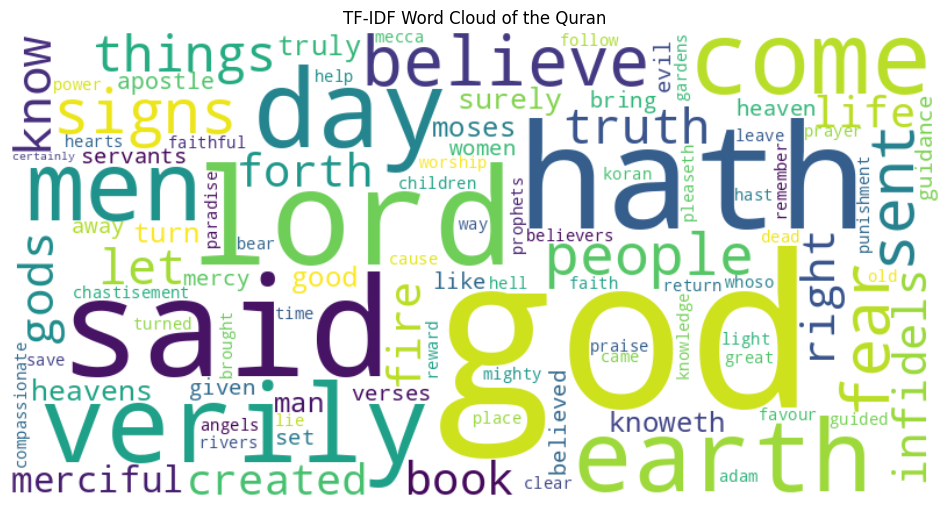

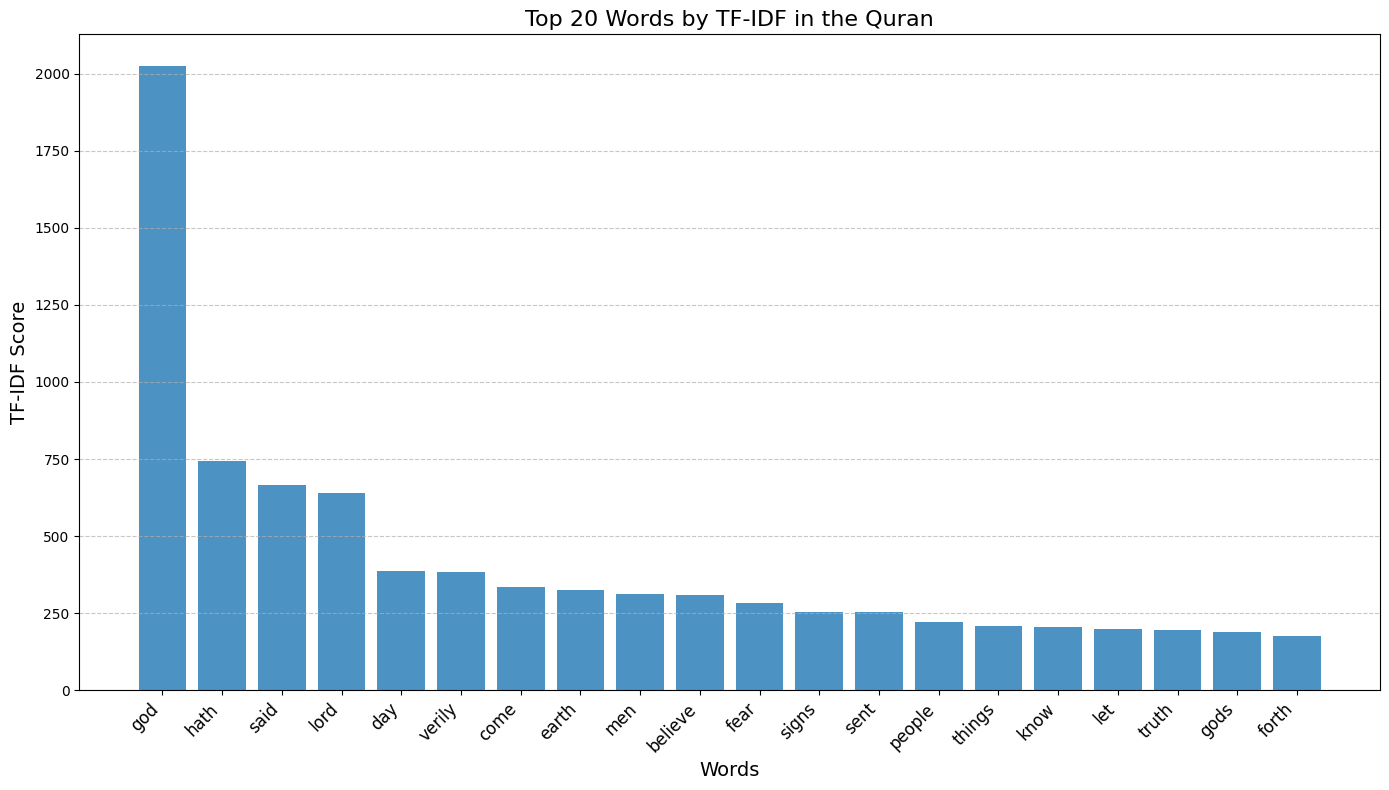

In [ ]:
nltk_stopwords = set(nltk.corpus.stopwords.words('english'))

nlp = spacy.load("en_core_web_sm")
spacy_stopwords = nlp.Defaults.stop_words

custom_stopwords = ["unto", "shall", "thy", "thee", "ye", "thou"]
all_stopwords = list(nltk_stopwords | spacy_stopwords | set(custom_stopwords))

spark = SparkSession.builder.appName("TF-IDF of the Quran").config("spark.executor.memory", "2g").config("spark.driver.memory", "2g").getOrCreate()

file_paths = sorted(glob.glob("quran_texts/chapter_*.txt"))
documents = [(i, open(file, 'r', encoding='utf-8').read()) for i, file in enumerate(file_paths)]
df = spark.createDataFrame(documents, ["doc_id", "text"])

df = df.withColumn("text", regexp_replace(lower(col("text")), "[^a-zA-Z\\s]", ""))

tokenizer = Tokenizer(inputCol="text", outputCol="words")
words_data = tokenizer.transform(df).cache()

remover = StopWordsRemover(inputCol="words", outputCol="filtered_words", stopWords=all_stopwords)
filtered_words_data = remover.transform(words_data).cache()

hashingTF = HashingTF(inputCol="filtered_words", outputCol="rawFeatures", numFeatures=500)
featurized_data = hashingTF.transform(filtered_words_data).cache()

idf = IDF(inputCol="rawFeatures", outputCol="features")
idf_model = idf.fit(featurized_data)
rescaled_data = idf_model.transform(featurized_data).cache()

def extract_words_and_tfidf(features, words):
    if isinstance(features, SparseVector):
        indices = features.indices
        values = features.values
        if len(indices) != len(values):
            return []
        return [(words[i], float(values[idx])) for idx, i in enumerate(indices) if i < len(words)]
    else:
        return []

extract_udf = udf(extract_words_and_tfidf, ArrayType(StructType([StructField("word", StringType()),StructField("tfidf", DoubleType())])))

exploded_data = rescaled_data.withColumn("word_tfidf", explode(extract_udf(col("features"), col("filtered_words"))))
word_tfidf_df = exploded_data.select(col("word_tfidf.word").alias("word"), col("word_tfidf.tfidf").alias("tfidf_score"))

top_words = word_tfidf_df.groupBy("word").sum("tfidf_score").withColumnRenamed("sum(tfidf_score)", "tfidf_score")
word_tfidf_pd_quran = top_words.orderBy(col("tfidf_score"), ascending=False).limit(100).toPandas()

word_tfidf_pd_quran.to_csv('/content/quran_tfidf.csv',index=False)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(word_tfidf_pd_quran.word, word_tfidf_pd_quran.tfidf_score))
)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("TF-IDF Word Cloud of the Quran")
plt.show()

plot_bar_chart(word_tfidf_pd_quran, "Top 20 Words by TF-IDF in the Quran", top_n=20)

spark.stop()

### Commonness
- Bible과 Quran의 TF-IDF 결과에서 각각 상위 N개 단어 추출
- 추출한 N개의 단어 중 공통으로 존재하는 단어로 워드 클라우드 생성

#### N값 설정
- N의 범위에 따른 공통 단어의 수 변화 (10 <= N <= 150)

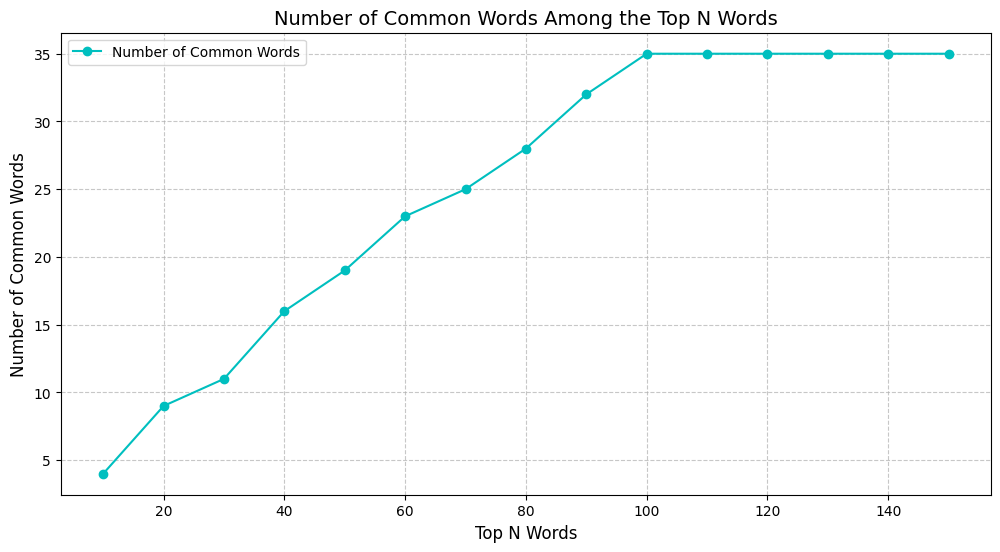

In [ ]:
N_values = list(range(10, 160, 10))
common_word_counts = []

for N in N_values:
    top_N_bible = word_tfidf_pd_bible.sort_values(by="tfidf_score", ascending=False).head(N)
    top_N_quran = word_tfidf_pd_quran.sort_values(by="tfidf_score", ascending=False).head(N)

    if "word" not in top_N_bible.columns or "word" not in top_N_quran.columns:
        print("Error: 단어 열 이름이 'word'가 아닙니다.")
        break

    bible_words_set = set(top_N_bible["word"].str.lower().str.strip())
    quran_words_set = set(top_N_quran["word"].str.lower().str.strip())

    common_words = bible_words_set.intersection(quran_words_set)

    common_word_counts.append(len(common_words))

plt.figure(figsize=(12, 6))
plt.plot(N_values, common_word_counts, marker='o', linestyle='-', color='c', label="Number of Common Words")
plt.title("Number of Common Words Among the Top N Words", fontsize=14)
plt.xlabel("Top N Words", fontsize=12)
plt.ylabel("Number of Common Words", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

#### Visualize
- Bible과 Quran의 TF-IDF 결과에서 상위 100개의 단어를 추출 후, 공통으로 존재하는 단어로 워드 클라우드 및 그래프 생성

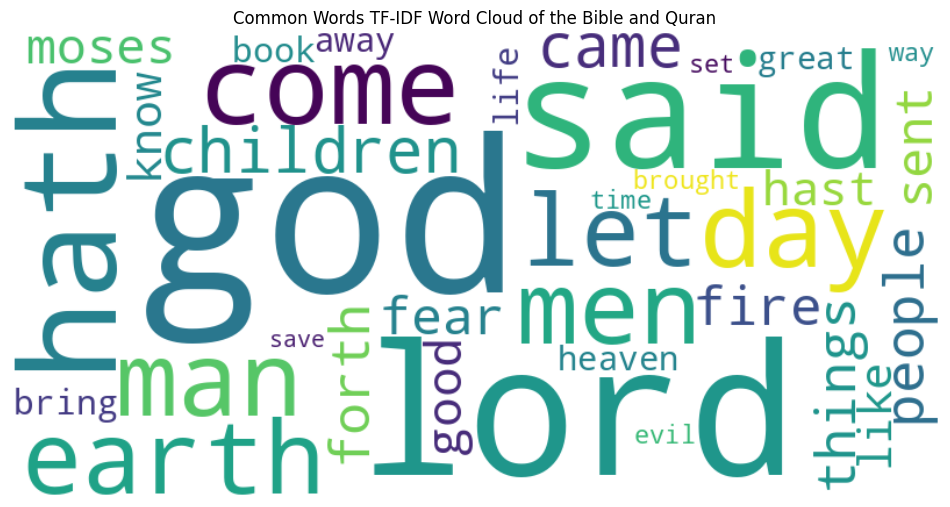

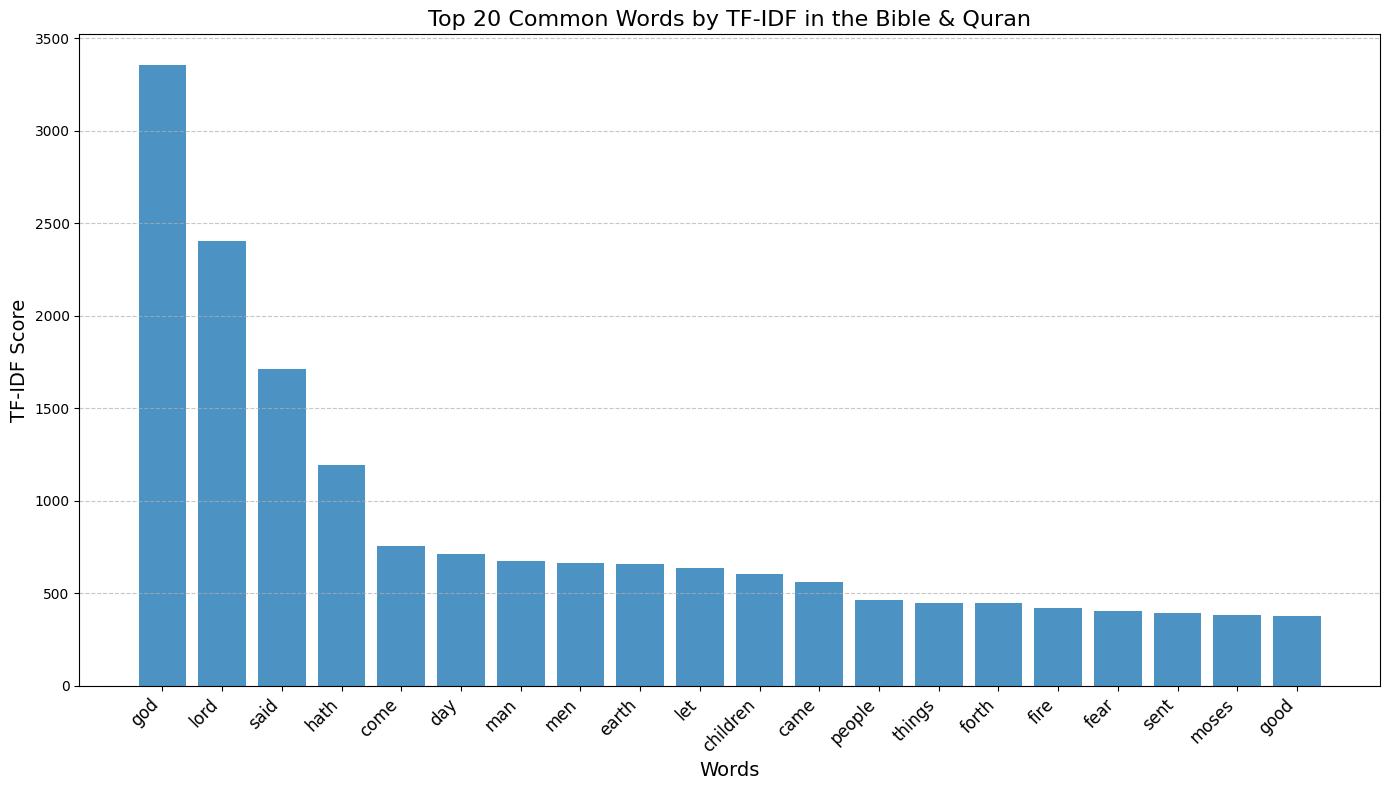

In [ ]:
N=100
top_N_bible = word_tfidf_pd_bible.sort_values(by="tfidf_score", ascending=False).head(N)
top_N_quran = word_tfidf_pd_quran.sort_values(by="tfidf_score", ascending=False).head(N)

bible_words_set = set(top_N_bible["word"])
quran_words_set = set(top_N_quran["word"])

common_words = set(word_tfidf_pd_bible['word']).intersection(set(word_tfidf_pd_quran['word']))

bible_common_tfidf = word_tfidf_pd_bible[word_tfidf_pd_bible['word'].isin(common_words)].set_index('word')['tfidf_score']
quran_common_tfidf = word_tfidf_pd_quran[word_tfidf_pd_quran['word'].isin(common_words)].set_index('word')['tfidf_score']

combined_tfidf = (bible_common_tfidf + quran_common_tfidf).fillna(0)

common_words_tfidf_df = combined_tfidf.reset_index()
common_words_tfidf_df.columns = ['word', 'tfidf_score']

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(combined_tfidf.to_dict())

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words TF-IDF Word Cloud of the Bible and Quran")
plt.show()

plot_bar_chart(common_words_tfidf_df, "Top 20 Common Words by TF-IDF in the Bible & Quran", top_n=20)

#### Word Dendogram 생성

##### Euclidean Distance

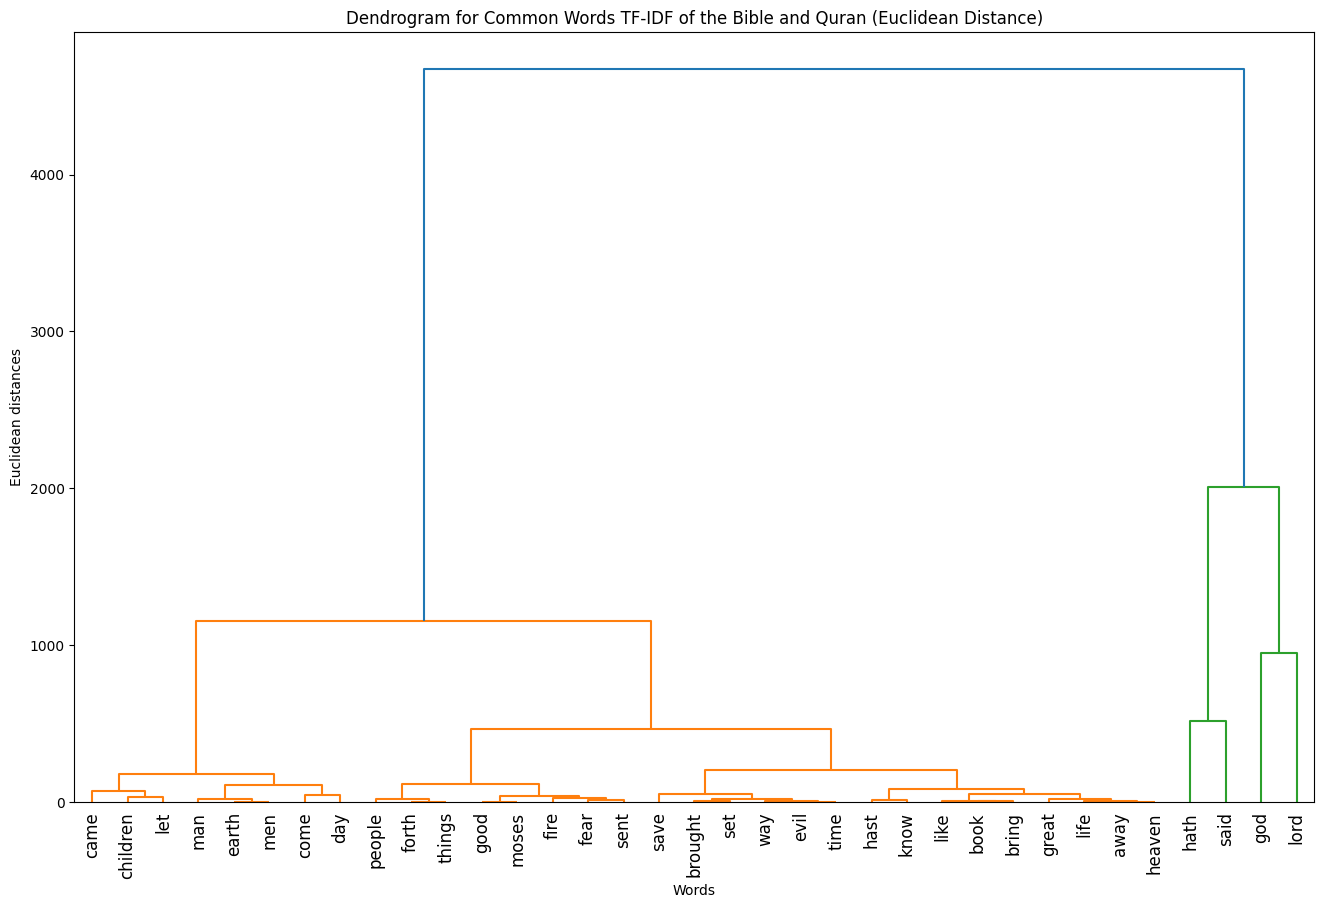

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

bible_tfidf_path = '/content/bible_tfidf.csv'
quran_tfidf_path = '/content/quran_tfidf.csv'

bible_tfidf_df = pd.read_csv(bible_tfidf_path)
quran_tfidf_df = pd.read_csv(quran_tfidf_path)

common_words = set(bible_tfidf_df['word']).intersection(set(quran_tfidf_df['word']))

bible_common_tfidf = bible_tfidf_df[bible_tfidf_df['word'].isin(common_words)].set_index('word')['tfidf_score']
quran_common_tfidf = quran_tfidf_df[quran_tfidf_df['word'].isin(common_words)].set_index('word')['tfidf_score']

combined_tfidf = (bible_common_tfidf + quran_common_tfidf).fillna(0)

linkage_matrix = linkage(combined_tfidf.values.reshape(-1, 1), method='ward')

plt.figure(figsize=(16, 10))
dendrogram(linkage_matrix, labels=combined_tfidf.index, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram for Common Words TF-IDF of the Bible and Quran (Euclidean Distance)')
plt.xlabel('Words')
plt.ylabel('Euclidean distances')
plt.show()

##### Manhattan Distance

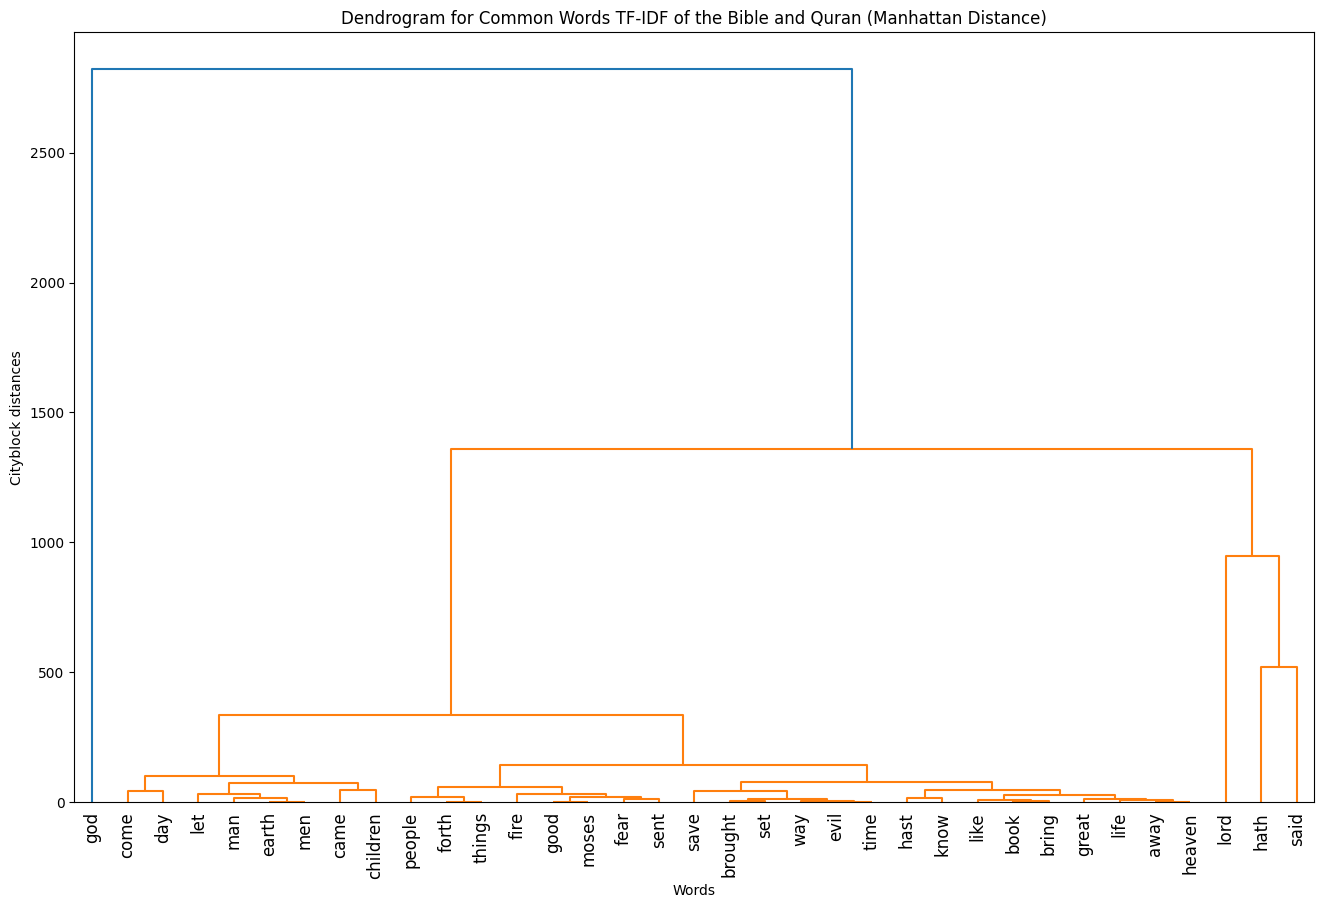

In [ ]:
def plot_dendrogram(data, method, metric, title):
    linkage_matrix = linkage(data, method=method, metric=metric)
    plt.figure(figsize=(16, 10))
    dendrogram(linkage_matrix, labels=combined_tfidf.index, leaf_rotation=90, leaf_font_size=12)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel(f'{metric.capitalize()} distances')
    plt.show()

data = combined_tfidf.values.reshape(-1, 1)
plot_dendrogram(data, method='average', metric='cityblock', title='Dendrogram for Common Words TF-IDF of the Bible and Quran (Manhattan Distance)')